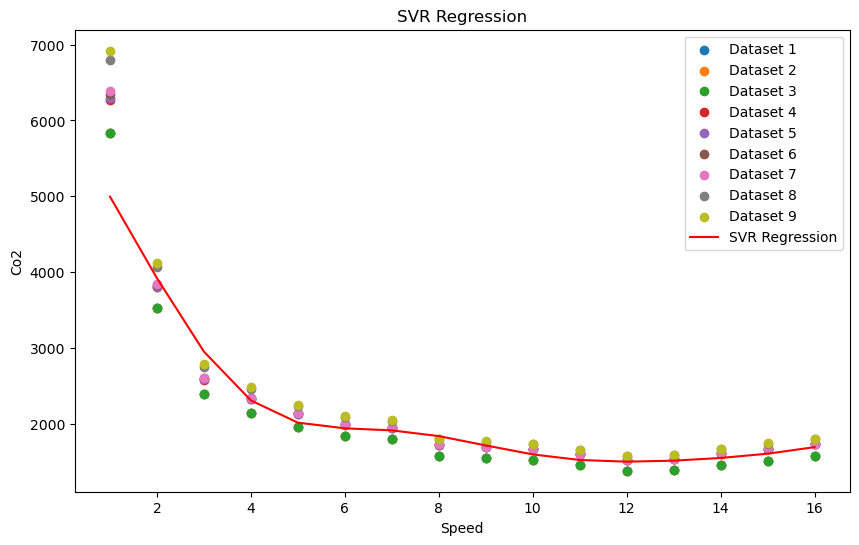

 Speed  Predicted Co2
     1    4994.337736
     2    3919.390667
     3    2950.559366
     4    2306.785633
     5    2013.999896
     6    1939.027584
     7    1912.131415
     8    1836.546199
     9    1713.826419
    10    1595.313592
    11    1521.791106
    12    1499.378901
    13    1512.742787
    14    1548.153906
    15    1604.660794
    16    1690.887621


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Assuming you have a list of Excel file paths
file_paths = [f"file{i}.xlsx" for i in range(1, 10)]
rates_datasets = []

# Read datasets from Excel files and assuming 'Co2' column for rates
for file_path in file_paths:
    df = pd.read_excel(file_path)  # This is a placeholder; you'll need to replace with actual file reading
    rates_datasets.append(df['Co2'].values)

# Define the data for all datasets
num_speed_points = 16
speed = np.array([i for i in range(1, num_speed_points + 1)]).reshape(-1, 1)

# Combine data from all datasets
all_speed = np.concatenate([speed] * len(rates_datasets))
all_rates = np.concatenate(rates_datasets)

# Data scaling
scaler_speed = StandardScaler()
scaler_rates = StandardScaler()
all_speed_scaled = scaler_speed.fit_transform(all_speed)
all_rates_scaled = scaler_rates.fit_transform(all_rates.reshape(-1, 1)).flatten()

# Create and fit the SVR model
svr_model = SVR(kernel='rbf')
svr_model.fit(all_speed_scaled, all_rates_scaled)

# Correct prediction for plotting
speed_scaled_for_plotting = scaler_speed.transform(speed)
svr_predictions_for_plotting_scaled = svr_model.predict(speed_scaled_for_plotting)
svr_predictions_for_plotting = scaler_rates.inverse_transform(svr_predictions_for_plotting_scaled.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(10, 6))
for i, rates_dataset in enumerate(rates_datasets):
    plt.scatter(speed, rates_dataset, label=f'Dataset {i+1}')
plt.plot(speed, svr_predictions_for_plotting, color='red', label='SVR Regression')
plt.title('SVR Regression')
plt.xlabel('Speed')
plt.ylabel('Co2')
plt.legend()
plt.show()

# Predict CO2 values for speed using the model and create a DataFrame with the predictions
predicted_co2_values_scaled = svr_model.predict(speed_scaled_for_plotting)
predicted_co2_values = scaler_rates.inverse_transform(predicted_co2_values_scaled.reshape(-1, 1)).flatten()
predicted_df = pd.DataFrame({
    'Speed': speed.flatten(),
    'Predicted Co2': predicted_co2_values
})

# Print the DataFrame
print(predicted_df.to_string(index=False))
